In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

akhilamadasthu_clay_name_path = kagglehub.dataset_download('akhilamadasthu/clay-name')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-06-17 12:04:08.218082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750161848.493224      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750161848.579999      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

training_set = train_datagen.flow_from_directory(
    "/kaggle/input/clay-name/images/training",
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    seed=42  # makes the split consistent across runs
)

validation_set = train_datagen.flow_from_directory(
    "/kaggle/input/clay-name/images/training",
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    seed=42
)

Found 1471 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [ ]:
validation_set[0][0][1]


array([[[0.4666667 , 0.46274513, 0.454902  ],
        [0.46274513, 0.45882356, 0.45098042],
        [0.45882356, 0.454902  , 0.44705886],
        ...,
        [0.63529414, 0.6313726 , 0.62352943],
        [0.5921569 , 0.5882353 , 0.5803922 ],
        [0.5529412 , 0.54901963, 0.5411765 ]],

       [[0.47058827, 0.4666667 , 0.45882356],
        [0.46274513, 0.45882356, 0.45098042],
        [0.4666667 , 0.46274513, 0.454902  ],
        ...,
        [0.6039216 , 0.6       , 0.5921569 ],
        [0.61960787, 0.6156863 , 0.60784316],
        [0.5647059 , 0.56078434, 0.5529412 ]],

       [[0.454902  , 0.45098042, 0.4431373 ],
        [0.4784314 , 0.47450984, 0.4666667 ],
        [0.4784314 , 0.47450984, 0.4666667 ],
        ...,
        [0.5882353 , 0.58431375, 0.5764706 ],
        [0.5764706 , 0.57254905, 0.5647059 ],
        [0.627451  , 0.62352943, 0.6156863 ]],

       ...,

       [[0.6862745 , 0.68235296, 0.6745098 ],
        [0.70980394, 0.7058824 , 0.69803923],
        [0.72156864, 0

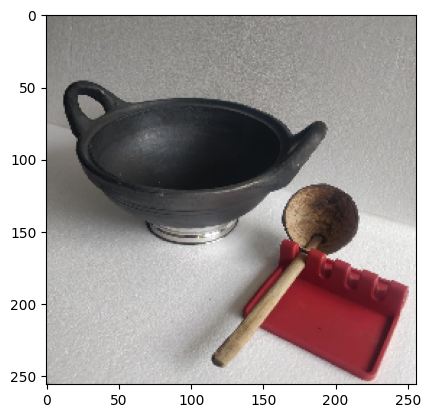

In [ ]:
plt.imshow(validation_set[0][0][1])
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Block 1
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))  # -> (64, 64, 32)

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # -> (32, 32, 64)

# Block 3
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # -> (16, 16, 128)

# Block 4
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # -> (8, 8, 256)



# Flatten and Fully Connected Layers
model.add(Flatten())  # Output: 4*4*128 = 2048
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))  # Final small dense layer
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750162073.916795      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750162073.917565      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,879,413 (7.17 MB)

 Trainable params: 1,879,413 (7.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'])

In [ ]:
model.fit(training_set, epochs=50,validation_data=validation_set)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1750162088.812331     119 service.cc:148] XLA service 0x7d2be0014b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750162088.813331     119 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750162088.813352     119 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750162089.316047     119 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/46 ━━━━━━━━━━━━━━━━━━━━ 12:17 16s/step - accuracy: 0.2188 - loss: 1.6074

I0000 00:00:1750162100.685055     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2433 - loss: 1.6084 - val_accuracy: 0.2637 - val_loss: 1.6042
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 32s 699ms/step - accuracy: 0.2592 - loss: 1.6042 - val_accuracy: 0.2637 - val_loss: 1.6011
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 32s 696ms/step - accuracy: 0.2658 - loss: 1.5992 - val_accuracy: 0.2637 - val_loss: 1.5905
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 32s 689ms/step - accuracy: 0.2673 - loss: 1.5920 - val_accuracy: 0.3379 - val_loss: 1.5229
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 743ms/step - accuracy: 0.2933 - loss: 1.5788 - val_accuracy: 0.3324 - val_loss: 1.5660
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 736ms/step - accuracy: 0.3086 - loss: 1.5675 - val_accuracy: 0.3599 - val_loss: 1.4325
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 36s 786ms/step - accuracy: 0.3180 - loss: 1.5429 - val_accuracy: 0.4313 - val_loss: 1.3850
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 35s 764ms/step - accuracy: 0.3869 - loss: 1.4631 - val_accuracy: 0.4698 -

In [ ]:
model.evaluate(validation_set)

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 614ms/step - accuracy: 0.6060 - loss: 3.2341


[3.122159481048584, 0.6181318759918213]

In [ ]:
import cv2
img = cv2.imread("/kaggle/input/clay-name/images/training/Clay jugs/Clay jug/Image_1.jpg")

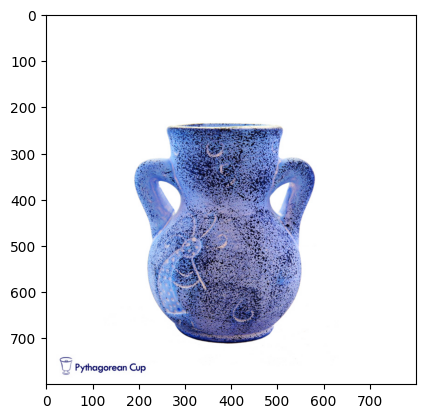

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(800, 800, 3)

In [ ]:
img= cv2.resize(img, (256, 256))

img = np.reshape(img, [1,256,256,3])
img=img/255

In [ ]:
training_set.class_indices

{'Clay cooking pots': 0,
 'Clay jugs': 1,
 'clay flower vase': 2,
 'clay lamps lamp (2)': 3,
 'clay platess': 4}

In [ ]:
classes = model.predict(img)
pred_index = np.argmax(classes)


class_indices = training_set.class_indices
labels = dict((v, k) for k, v in class_indices.items())


print("Predicted class index:", pred_index)
print("Predicted label:", labels[pred_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class index: 1
Predicted label: Clay jugs


#### Import Pre-trained Model VGG16

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(256, 256, 3))
conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Freeze all convolution blocks
for layer in conv_base.layers[:]:
    layer.trainable = False

# # Make sure you have frozen the correct layers
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_layer_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    training_set,
    epochs=50,
    validation_data=validation_set
)

Epoch 1/50


2025-06-17 12:56:51.451359: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k11=0} for conv (f32[32,128,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,128,128]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-06-17 12:56:52.094833: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.643605086s
Trying algorithm eng12{k11=0} for conv (f32[32,128,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,128,128]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivatio

 3/46 ━━━━━━━━━━━━━━━━━━━━ 28s 653ms/step - accuracy: 0.2361 - loss: 4.6282

2025-06-17 12:57:14.224743: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k11=0} for conv (f32[31,128,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,128,128,128]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-06-17 12:57:15.957790: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.733218473s
Trying algorithm eng12{k11=0} for conv (f32[31,128,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[31,128,128,128]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivatio

46/46 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3531 - loss: 3.3339 - val_accuracy: 0.7280 - val_loss: 0.8920
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 32s 706ms/step - accuracy: 0.6171 - loss: 1.0203 - val_accuracy: 0.7280 - val_loss: 0.8040
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 736ms/step - accuracy: 0.6893 - loss: 0.7930 - val_accuracy: 0.7912 - val_loss: 0.6717
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 731ms/step - accuracy: 0.7253 - loss: 0.7018 - val_accuracy: 0.8077 - val_loss: 0.6228
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 33s 713ms/step - accuracy: 0.7637 - loss: 0.6236 - val_accuracy: 0.7967 - val_loss: 0.6203
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 734ms/step - accuracy: 0.7772 - loss: 0.5415 - val_accuracy: 0.8159 - val_loss: 0.6020
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 33s 715ms/step - accuracy: 0.8403 - loss: 0.4574 - val_accuracy: 0.8462 - val_loss: 0.5335
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 34s 742ms/step - accuracy: 0.8305 - loss: 0.4544 - val_accuracy: 0.8434 -

In [ ]:
model.evaluate(validation_set)

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.8488 - loss: 0.9109


[0.9028794169425964, 0.8406593203544617]

In [ ]:
model.save('model1.h5')

In [ ]:
import cv2
img = cv2.imread("/kaggle/input/clay-name/images/training/Clay jugs/Clay jug/Image_10.jpg")

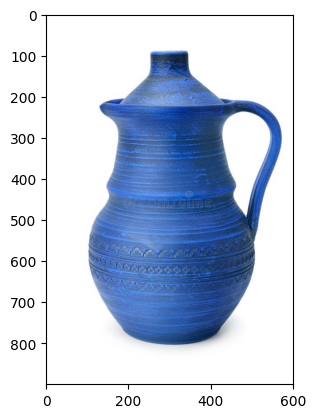

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(900, 601, 3)

In [ ]:
img= cv2.resize(img, (256, 256))

img = np.reshape(img, [1,256,256,3])

img=img/255

In [ ]:
classes = model.predict(img)
print(classes[0])
np.argmax(classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[5.3999283e-08 9.9999988e-01 7.2027447e-08 2.8762436e-13 8.7922258e-19]


1

In [ ]:
training_set.class_indices

{'Clay cooking pots': 0,
 'Clay jugs': 1,
 'clay flower vase': 2,
 'clay lamps lamp (2)': 3,
 'clay platess': 4}